In [1]:
# Importing
%matplotlib inline
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing
import seaborn as sns

In [2]:
from data_handler.DataHandler import DataHandler

In [3]:
handler = DataHandler(readAllDataNow = True) 

In [4]:
testPair = handler.getDatasetPairFor(2, 'infinity')

In [5]:
testPair[1].shape

(536, 164)

In [38]:
df = pd.DataFrame(np.concatenate((testPair[0], testPair[1][:, :8]), axis = 1), columns = ['TarX', 'TarY', 'GazeX', 'GazeY', 'PosX', 'PosY', 'PosZ', 'OrX', 'OrY', 'OrZ'])

In [39]:
df[['TarX', 'GazeX']] =  -1*df[['TarX', 'GazeX']]/5 + 192
df[['TarY', 'GazeY']] = df[['TarY', 'GazeY']]/5 + 55

In [40]:
df.head(20)

,TarX,TarY,GazeX,GazeY,PosX,PosY,PosZ,OrX,OrY,OrZ
0,1.2,160.0,-23.420481,59.138518,-7.360595,71.025475,350.669707,-0.034153,0.045532,-0.012758
1,2.4,157.0,-47.680201,82.944087,-12.006477,114.129509,562.836264,-0.056036,0.062564,-0.024064
2,3.6,154.0,-39.491656,92.782445,-13.999283,131.680366,645.007305,-0.060933,0.038323,-0.037418
3,4.8,151.2,-40.683808,91.112192,-14.551802,138.378077,675.238506,-0.070571,0.037295,-0.037749
4,6.0,148.2,-33.900240,96.346674,-14.969350,140.961378,687.746585,-0.065310,0.026168,-0.040397
5,7.2,145.2,-31.878463,100.247412,-15.214401,142.217149,694.048435,-0.060854,0.022775,-0.039668
6,8.4,142.2,-32.742784,103.360939,-15.290076,141.821231,694.209825,-0.055843,0.023966,-0.041177
7,9.6,139.2,-30.870497,101.817930,-15.398161,142.411341,696.936627,-0.058633,0.020932,-0.042498
8,10.6,136.2,-25.760402,104.046326,-15.431909,142.386011,698.359320,-0.055164,0.013536,-0.045021
9,11.8,133.2,-26.058041,103.680621,-15.510310,142.901317,699.811591,-0.056303,0.013824,-0.043910


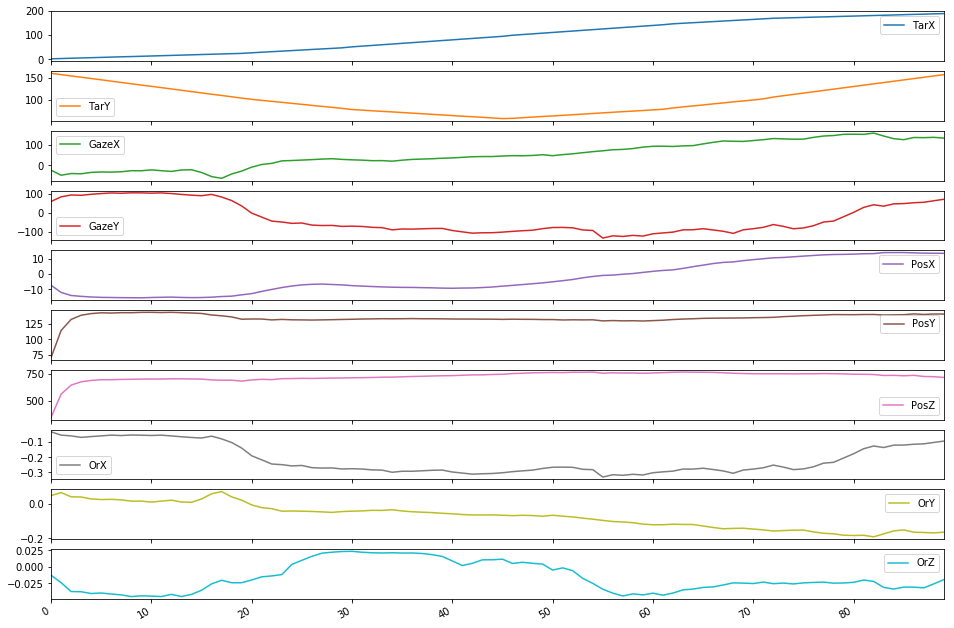

In [41]:
ax = df.head(90).plot(subplots =True, sharex = True, figsize = (16,12))

In [27]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [76]:
#ax1 = normalized_df.plot(subplots=True, sharex=True, figsize=(20,5))

In [42]:
df_corr = df.corr()
df_corr

,TarX,TarY,GazeX,GazeY,PosX,PosY,PosZ,OrX,OrY,OrZ
TarX,1.000000e+00,8.930038e-07,0.923838,-0.159723,0.924324,-0.082318,0.160517,-0.153395,-0.919276,0.447088
TarY,8.930038e-07,1.000000e+00,-0.009047,0.914215,0.051402,0.917428,0.347653,0.906940,0.006784,0.024146
GazeX,9.238378e-01,-9.047082e-03,1.000000,-0.196337,0.964203,-0.122205,0.096202,-0.190890,-0.997518,0.397932
GazeY,-1.597230e-01,9.142155e-01,-0.196337,1.000000,-0.102573,0.948486,0.268717,0.998532,0.201486,0.061518
PosX,9.243242e-01,5.140212e-02,0.964203,-0.102573,1.000000,-0.041299,0.088331,-0.095286,-0.948066,0.477982
PosY,-8.231787e-02,9.174275e-01,-0.122205,0.948486,-0.041299,1.000000,0.494910,0.934638,0.121711,0.023474
PosZ,1.605171e-01,3.476529e-01,0.096202,0.268717,0.088331,0.494910,1.000000,0.240520,-0.125153,-0.088359
OrX,-1.533952e-01,9.069404e-01,-0.190890,0.998532,-0.095286,0.934638,0.240520,1.000000,0.197073,0.083088
OrY,-9.192757e-01,6.784486e-03,-0.997518,0.201486,-0.948066,0.121711,-0.125153,0.197073,1.000000,-0.383242
OrZ,4.470878e-01,2.414590e-02,0.397932,0.061518,0.477982,0.023474,-0.088359,0.083088,-0.383242,1.000000


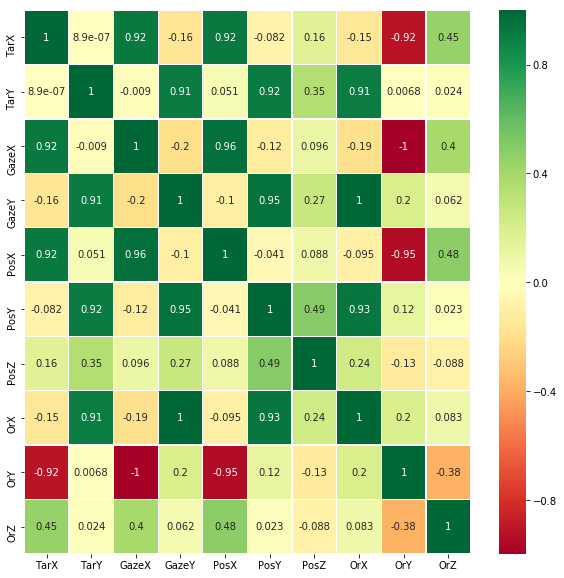

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2);

In [44]:
table = df_corr[['TarX', 'TarY', 'GazeX', 'GazeY']].T.drop(columns=['TarX', 'TarY'])

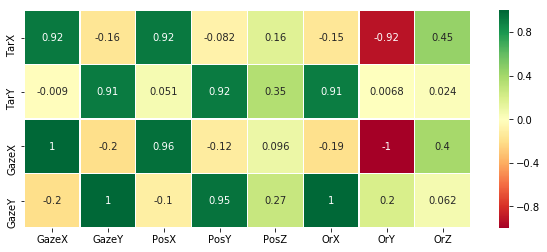

In [45]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(table, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2);